
###connect to drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Setup the Environment

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the CSV file as a Pandas DataFrame object. Name it “df_raw”. Display the first five rows and a summary of dataset information.

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/adult(in).csv', header = 0)
summary = df_raw.info()
display(df_raw.head(5))
display(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32560 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relatioship     32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relatioship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,NaN,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


None

#Data Preprocessing
###Check for missing values in the dataset (display using the print method) and handle them using appropriate techniques. Finally, display whether missing values exist

In [ ]:
df_raw.replace(' ?', np.nan, inplace=True)
missing_median = df_raw['age'].median()
df_raw.replace(np.nan, missing_median, inplace=True)
print(df_raw.head(5))
print(df_raw.isna().sum())

    age          workclass  fnlwgt   education  education-num  \
0  37.0          State-gov   77516   Bachelors             13   
1  50.0   Self-emp-not-inc   83311   Bachelors             13   
2  38.0            Private  215646     HS-grad              9   
3  53.0            Private  234721        11th              7   
4  28.0            Private  338409   Bachelors             13   

        marital-status          occupation     relatioship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States 

In [ ]:
df_raw.isna().any().any()

np.False_

###Hot encoding the categorical features into numerical format

In [ ]:
categorical_col = df_raw.select_dtypes(include=['category','object']).columns
hot_encoded_cat_col = pd.get_dummies(df_raw[categorical_col], drop_first= True).astype(int)
hot_encoded_cat_col.head(5)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Create a new DataFrame “df” that includes both numeric and encoded categorical columns without redundancy.

In [ ]:
non_categorical_col = df_raw.columns.difference(categorical_col)
non_categorical_col
df = pd.concat([hot_encoded_cat_col, df_raw[non_categorical_col]], axis=1)
df.head(5)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K,age,capital-gain,capital-loss,education-num,fnlwgt,hours-per-week
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,37.0,2174,0,13,77516,40
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,50.0,0,0,13,83311,13
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,38.0,0,0,9,215646,40
3,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,53.0,0,0,7,234721,40
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,28.0,0,0,13,338409,40


###Create a deep copy of this DataFrame “df_copy” for use in Experiment 2.

In [ ]:
df_copy = df.copy()

#Data Separation
###Create a “target” DataFrame containing the target variable and a “features” DataFrame containing all feature columns.

In [ ]:
df_features = df.drop('income_ >50K', axis=1)
target_binary_income = df['income_ >50K']
print(df_features.head(5))
print(target_binary_income.head(5))

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   
1                       0                     0                        0   
2                       0                     0                        0   
3                       0                     0                        0   
4                       0                     0                        0   

   workclass_ Private  workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  \
0                   0                        0                            0   
1                   0                        0                            1   
2                   1                        0                            0   
3                   1                        0                            0   
4                   1                        0                            0   

   workclass_ State-gov  workclass_ Without-pay  education_ 11th  \


### From the “features” and “target” DataFrame objects, create a NumPy ndarray for the feature matrix X and a 1D array for the target y.

In [ ]:
X = df_features.to_numpy()
y = target_binary_income.to_numpy()

print(X)
print(y)

[[0.00000e+00 0.00000e+00 0.00000e+00 ... 1.30000e+01 7.75160e+04
  4.00000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.30000e+01 8.33110e+04
  1.30000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 9.00000e+00 2.15646e+05
  4.00000e+01]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 9.00000e+00 1.51910e+05
  4.00000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 9.00000e+00 2.01490e+05
  2.00000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 9.00000e+00 2.87927e+05
  4.00000e+01]]
[0 0 0 ... 0 0 1]


#Train Test Validation slip

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Train/Test split (20% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# From the remaining 80%, carve out Validation = 20% of that (i.e., 16% of original)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.20, random_state=42, stratify=y_train_full
)

# Display shapes
def shape(a):  # works for NumPy arrays or pandas objects
    return np.asarray(a).shape

print("Train X:", shape(X_train), "   Train y:", shape(y_train))
print("Val   X:", shape(X_val),   "   Val   y:", shape(y_val))
print("Test  X:", shape(X_test),  "   Test  y:", shape(y_test))


Train X: (20838, 100)    Train y: (20838,)
Val   X: (5210, 100)    Val   y: (5210,)
Test  X: (6513, 100)    Test  y: (6513,)


#Experiment 1

#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)   # fit ONLY on train
X_val_scaled = scaler.transform(X_val)      # transform with train stats
X_test_scaled = scaler.transform(X_test)    # transform with train stats

In [ ]:
# Install Keras Tuner in Colab (run this cell once)
!pip -q install -U keras-tuner

# Quick sanity check
import keras_tuner as kt
print("keras-tuner version:", kt.__version__)

keras-tuner version: 1.4.7


In [ ]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Input dimensionality (use the feature matrix you’ll train with)
n_features = X_train_scaled.shape[1]   # or X_train.shape[1] if you haven't scaled yet

# Build a Linear Neural Network for binary classification
#    Architecture: Input(d) -> Dense(1, sigmoid); no weight regularization yet.
model = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(1, activation="sigmoid", kernel_regularizer=None)
])

# compile
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 4) Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

#Experiment 1 (For optimal logistic regression LNN)

###In this step I tune a binary Linear Neural Network (logistic regression) on the Adult dataset using KerasTuner / Hyperband. The model is strictly linear (Dense(1, sigmoid)) and I require L2 regularization (no “None”) to control variance. I search over learning rate, epochs, batch size, and L2 strength, validating on the held-out validation split to avoid leakage. Early stopping prevents wasting epochs on unpromising trials. I then print the best hyperparameters found.

In [ ]:

# Import library
import numpy as np, tensorflow as tf
tf.keras.backend.clear_session()
np.random.seed(42); tf.random.set_seed(42)

import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Basic data/model metadata
model_name = "LNN_ADULT_Exp1"
n_features = X_train_scaled.shape[1]   # number of input features (columns) in the scaled training set

# HyperModel: a binary LNN (logistic regression) whose HPs is searched
class BinaryLNNHyperModel(kt.HyperModel):
    def __init__(self, model_name, n_features):
        self.model_name = model_name
        self.n_features = n_features

    def build(self, hp):
        # L2 penalty is REQUIRED (no zero); typical magnitudes for standardized features
        l2 = hp.Choice("l2", values=[1e-6, 1e-5, 1e-4, 1e-3, 1e-2])
        # Learning rate searched on a log scale to cover several orders of magnitude
        lr = hp.Float("learning_rate", 1e-4, 5e-1, sampling="log")

        # Linear model: Input(d), Dense(1, sigmoid)
        model = keras.Sequential(name=self.model_name)
        model.add(layers.Input(shape=(self.n_features,)))
        model.add(layers.Dense(
            units=1,                         # single logit for binary classification
            activation="sigmoid",            # converts logit to P(class=1)
            kernel_initializer="zeros",      # start at zero weights
            kernel_regularizer=regularizers.L2(l2)  # enforce L2 > 0 for variance control
        ))

        # SGD is sufficient for this convex problem; track accuracy for selection
        model.compile(
            optimizer=keras.optimizers.SGD(learning_rate=lr),
            loss="binary_crossentropy",
            metrics=["accuracy"]
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        # Use to remove user-supplied epochs if any; the tuner will set it
        kwargs.pop("epochs", None)
        # Tune epochs and batch size; pass through any additional fit() kwargs (e.g., validation_data)
        return model.fit(
            *args,
            epochs=hp.Int("epochs", 10, 100, step=10),
            batch_size=hp.Choice("batch_size", [32, 64, 128, 256]),
            **kwargs
        )

# Tuner setup: Hyperband efficiently allocates epochs across many HP settings
tuner = kt.Hyperband(
    BinaryLNNHyperModel(model_name, n_features),
    objective="val_accuracy",     # select by validation accuracy to avoid overfitting
    max_epochs=100,               # upper bound per bracket
    factor=3,                     # resource reduction factor across brackets
    executions_per_trial=1,       # one run per configuration (can increase for stability)
    directory="my_dir",           # where trials are logged
    project_name="exp1_lnn_binary_l2",
    overwrite=True                # start fresh each time
)

# Early stopping during the search to cut off trials that stop improving
early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=8,
    restore_best_weights=True
)

# Run the search on TRAIN data, validating on VAL data
tuner.search(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early],
    verbose=1
)

# Retrieve the best model and its hyperparameters
best_model = tuner.get_best_models(1)[0]
best_hp    = tuner.get_best_hyperparameters(1)[0]

print("Best HPs (Exp 1):", {
    "learning_rate": best_hp.get("learning_rate"),
    "batch_size":    best_hp.get("batch_size"),
    "epochs":        best_hp.get("epochs"),
    "l2":            best_hp.get("l2")
})


Trial 253 Complete [00h 00m 11s]
val_accuracy: 0.8449136018753052

Best val_accuracy So Far: 0.850287914276123
Total elapsed time: 01h 59m 07s
Best HPs (Exp 1): {'learning_rate': 0.19941264545410042, 'batch_size': 256, 'epochs': 90, 'l2': 1e-05}


In [ ]:
# Import library
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers


In [ ]:
# Train the model with optimal hyperparameters

# Early stopping: monitor validation loss, restore best weights
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0,
    patience=10,
    mode='auto',
    restore_best_weights=True,
    verbose=1
)

# Training
history = model.fit(
    X_train_scaled, y_train,
    epochs=best_hp.get('epochs'),
    batch_size=best_hp.get('batch_size'),
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping_cb],
    verbose=1
)

# Simple confirmation
print("Epochs run:", len(history.history['loss']))

Epoch 1/90
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4846 - loss: 0.8372 - val_accuracy: 0.6298 - val_loss: 0.6766
Epoch 2/90
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6720 - loss: 0.6448 - val_accuracy: 0.7223 - val_loss: 0.5693
Epoch 3/90
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7474 - loss: 0.5511 - val_accuracy: 0.7635 - val_loss: 0.5088
Epoch 4/90
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7795 - loss: 0.4961 - val_accuracy: 0.7848 - val_loss: 0.4698
Epoch 5/90
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8008 - loss: 0.4596 - val_accuracy: 0.8000 - val_loss: 0.4426
Epoch 6/90
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8137 - loss: 0.4338 - val_accuracy: 0.8075 - val_loss: 0.4229
Epoch 7/90
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8218 - loss: 0.4147 - val_accuracy: 0.8138 - val_loss: 0.4081
Epoch 8/90
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8269 - loss: 0.4002 - val_accuracy: 0.8207 - val_loss:

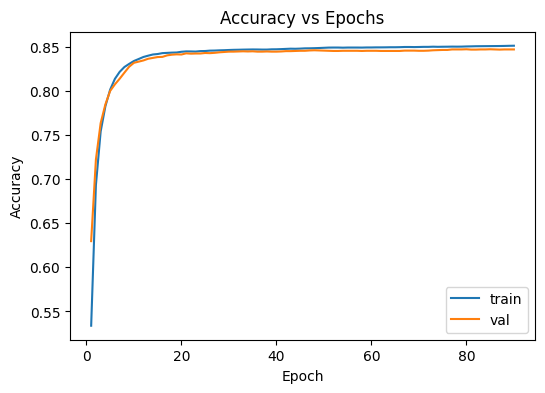

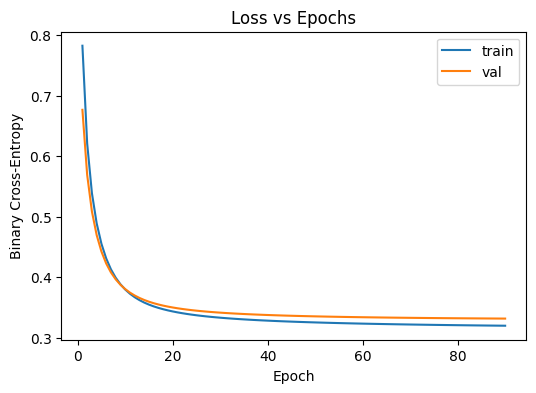

In [ ]:
# Learning curves (accuracy and loss) from `history`

import matplotlib.pyplot as plt

epochs = range(1, len(history.history["loss"]) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, history.history["accuracy"], label="train")
plt.plot(epochs, history.history["val_accuracy"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Accuracy vs Epochs")
plt.legend(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(epochs, history.history["loss"], label="train")
plt.plot(epochs, history.history["val_loss"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Binary Cross-Entropy"); plt.title("Loss vs Epochs")
plt.legend(); plt.show()


In [ ]:
# Evaluate the LNN model (binary)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# epochs actually run (with early stopping)
num_epochs_run = len(history.history['loss'])
print("Epochs run:", num_epochs_run)

# loss & accuracy from Keras
train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss,  test_acc  = model.evaluate(X_test_scaled,  y_test,  verbose=0)
print("\nTrain: Loss, Accuracy =", (train_loss, train_acc))
print("Test : Loss, Accuracy =", (test_loss,  test_acc))

# hard labels from probabilities (threshold = 0.5)
y_train_prob = model.predict(X_train_scaled, verbose=0).ravel()
y_test_prob  = model.predict(X_test_scaled,  verbose=0).ravel()
y_train_pred = (y_train_prob >= 0.5).astype(int)
y_test_pred  = (y_test_prob  >= 0.5).astype(int)

# accuracy (redundant with evaluate but shown explicitly)
print("\nTrain Accuracy:", round(accuracy_score(y_train, y_train_pred), 4))
print("Test  Accuracy:", round(accuracy_score(y_test,  y_test_pred),  4))

# confusion matrix and classification report (test set)
print("\nTest Confusion Matrix (rows=true 0/1, cols=pred 0/1):")
print(confusion_matrix(y_test, y_test_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred, digits=4))


Epochs run: 90

Train: Loss, Accuracy = (0.3198017179965973, 0.8511853218078613)
Test : Loss, Accuracy = (0.31871673464775085, 0.8538308143615723)

Train Accuracy: 0.8512
Test  Accuracy: 0.8538

Test Confusion Matrix (rows=true 0/1, cols=pred 0/1):
[[4589  356]
 [ 596  972]]

Test Classification Report:
              precision    recall  f1-score   support

           0     0.8851    0.9280    0.9060      4945
           1     0.7319    0.6199    0.6713      1568

    accuracy                         0.8538      6513
   macro avg     0.8085    0.7740    0.7886      6513
weighted avg     0.8482    0.8538    0.8495      6513



#Experiment 2 (hyperparameter tuning without feature scaling)
###In this step I tune a binary LNN (logistic regression) on the unscaled Adult features to compare against the standardized case. Because feature magnitudes differ, I search a more conservative learning-rate range and allow L2 to be optional (0.0 means no weight penalty). I use Hyperband with early stopping and select by validation accuracy to keep model choice unbiased. The tuning runs only on the train split and validates on the validation split to avoid leakage

In [ ]:
df_copy.head(5)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K,age,capital-gain,capital-loss,education-num,fnlwgt,hours-per-week
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,37.0,2174,0,13,77516,40
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,50.0,0,0,13,83311,13
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,38.0,0,0,9,215646,40
3,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,53.0,0,0,7,234721,40
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,28.0,0,0,13,338409,40


In [ ]:
# Prepare features/target from df_copy (NO SCALING)
# df_copy is a deep copy made earlier from the cleaned/encoded df

# target column name
target_col = "income_ >50K"   # change if yours is different (0/1)

# split into X,y
X_ns = df_copy.drop(columns=[target_col]).to_numpy(dtype="float32")
y_ns = df_copy[target_col].to_numpy().astype("int32")
print("No-scale X shape:", X_ns.shape, "  y shape:", y_ns.shape)


No-scale X shape: (32561, 100)   y shape: (32561,)


In [ ]:
# Split (NO STANDARDIZATION)
from sklearn.model_selection import train_test_split

# 20% test
X_train_ns_full, X_test_ns, y_train_ns_full, y_test_ns = train_test_split(
    X_ns, y_ns, test_size=0.20, random_state=42, stratify=y_ns
)

# From remaining 80%, take 20% for validation (i.e., 16% of original)
X_train_ns, X_valid_ns, y_train_ns, y_valid_ns = train_test_split(
    X_train_ns_full, y_train_ns_full, test_size=0.20, random_state=42, stratify=y_train_ns_full
)

print("Train:", X_train_ns.shape, " Val:", X_valid_ns.shape, " Test:", X_test_ns.shape)


Train: (20838, 100)  Val: (5210, 100)  Test: (6513, 100)


In [ ]:
# Imports
import numpy as np, tensorflow as tf, keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers, regularizers

tf.keras.backend.clear_session()
np.random.seed(42); tf.random.set_seed(42)

# Data/model metadata (using the UN-SCALED splits)
model_name_ns = "LNN_ADULT_Exp2_NoScale"
n_features_ns = X_train_ns.shape[1]   # number of raw (unscaled) input features

# HyperModel for a binary LNN on unscaled inputs
class BinaryLNNHyperModel_NoScale(kt.HyperModel):
    def __init__(self, name, d):
        self.name = name
        self.d    = d

    def build(self, hp):
        # Narrower LR range: raw feature scales vary; large LR is risky
        lr = hp.Float("learning_rate", 1e-5, 1e-1, sampling="log")
        # Allow "no regularization" (0.0) and small L2 penalties
        l2 = hp.Choice("l2", [0.0, 1e-6, 1e-5, 1e-4, 1e-3])

        model = keras.Sequential(name=self.name)
        model.add(layers.Input(shape=(self.d,)))
        model.add(layers.Dense(
            1,
            activation="sigmoid",
            kernel_initializer="zeros",
            # If l2==0.0, skip the regularizer; otherwise apply L2(l2)
            kernel_regularizer=(regularizers.L2(l2) if l2 > 0.0 else None)
        ))

        model.compile(
            optimizer=keras.optimizers.SGD(learning_rate=lr),
            loss="binary_crossentropy",
            metrics=["accuracy"]
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        # Let the tuner control epochs; remove any user-supplied value
        kwargs.pop("epochs", None)
        return model.fit(
            *args,
            epochs=hp.Int("epochs", 20, 150, step=10),
            batch_size=hp.Choice("batch_size", [32, 64, 128, 256]),
            **kwargs
        )

# Tuner: Hyperband allocates epochs efficiently across configs
tuner_ns = kt.Hyperband(
    BinaryLNNHyperModel_NoScale(model_name_ns, n_features_ns),
    objective="val_accuracy",
    max_epochs=150,
    factor=3,
    directory="my_dir",
    project_name="exp2_lnn_binary_no_scale",
    overwrite=True
)

# Early stopping to cut off unpromising trials and restore the best epoch
early_ns = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# Run the search on TRAIN (unscaled) with VALIDATION (unscaled)
tuner_ns.search(
    X_train_ns, y_train_ns,
    validation_data=(X_valid_ns, y_valid_ns),
    callbacks=[early_ns],
    verbose=1
)

# Fetch the best model and its hyperparameters
best_model_ns = tuner_ns.get_best_models(1)[0]
best_hp_ns    = tuner_ns.get_best_hyperparameters(1)[0]
print("Best HPs (Exp2, no-scale):", {
    "lr":     best_hp_ns.get("learning_rate"),
    "bs":     best_hp_ns.get("batch_size"),
    "epochs": best_hp_ns.get("epochs"),
    "l2":     best_hp_ns.get("l2")
})


Trial 254 Complete [00h 00m 14s]
val_accuracy: 0.7928982973098755

Best val_accuracy So Far: 0.7940499186515808
Total elapsed time: 01h 13m 57s
Best HPs (Exp2, no-scale): {'lr': 2.607982203880015e-05, 'bs': 128, 'epochs': 130, 'l2': 1e-06}


In [ ]:
# Train final no-scale model
early_ns2 = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
history_ns = best_model_ns.fit(
    X_train_ns, y_train_ns,
    validation_data=(X_valid_ns, y_valid_ns),
    epochs=best_hp_ns.get("epochs"),
    batch_size=best_hp_ns.get("batch_size"),
    callbacks=[early_ns2],
    verbose=1
)


Epoch 1/130
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6654 - loss: 70433.3594 - val_accuracy: 0.7768 - val_loss: 78991.0781
Epoch 2/130
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6678 - loss: 73136.4922 - val_accuracy: 0.7772 - val_loss: 79053.0781
Epoch 3/130
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6699 - loss: 71610.7891 - val_accuracy: 0.7781 - val_loss: 76681.3438
Epoch 4/130
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - loss: 71498.7031 - val_accuracy: 0.7789 - val_loss: 73532.6797
Epoch 5/130
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6699 - loss: 71371.9766 - val_accuracy: 0.7787 - val_loss: 76555.8750
Epoch 6/130
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6693 - loss: 71726.9141 - val_accuracy: 0.7787 - val_loss: 76481.8125
Epoch 7/130
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - loss: 71409.8125 - val_accuracy: 0.7791 - val_loss: 74852.0938
Epoch 8/130
163/163 ━━━━━━━━━━━━━━━━━━━━ 

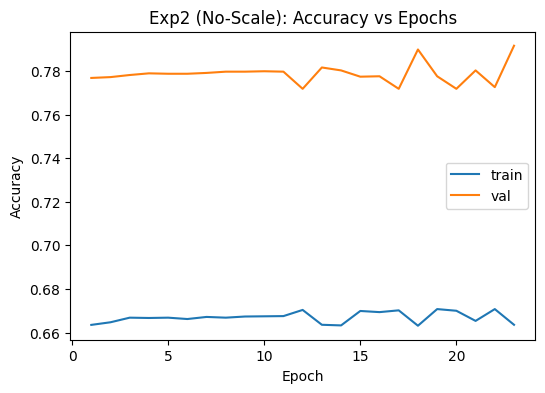

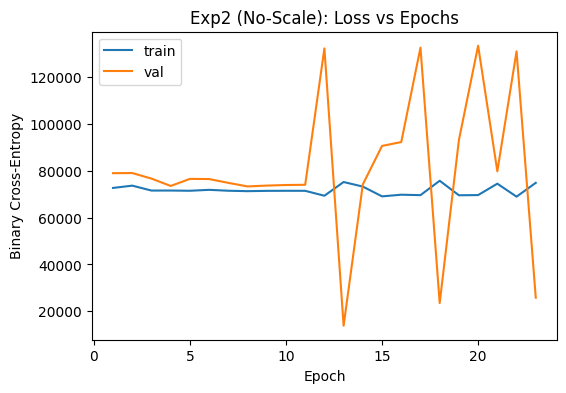

In [ ]:
# Learning curves (no-scale)
import matplotlib.pyplot as plt
ep = range(1, len(history_ns.history["loss"])+1)

plt.figure(figsize=(6,4))
plt.plot(ep, history_ns.history["accuracy"], label="train")
plt.plot(ep, history_ns.history["val_accuracy"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Exp2 (No-Scale): Accuracy vs Epochs")
plt.legend(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(ep, history_ns.history["loss"], label="train")
plt.plot(ep, history_ns.history["val_loss"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Binary Cross-Entropy"); plt.title("Exp2 (No-Scale): Loss vs Epochs")
plt.legend(); plt.show()


In [ ]:
# Evaluation of the performance metrics(no-scale)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tr_loss_ns, tr_acc_ns = best_model_ns.evaluate(X_train_ns, y_train_ns, verbose=0)
te_loss_ns, te_acc_ns = best_model_ns.evaluate(X_test_ns,  y_test_ns,  verbose=0)
print("Exp2 (No-Scale) | Train loss/acc:", (tr_loss_ns, tr_acc_ns))
print("Exp2 (No-Scale) | Test  loss/acc:", (te_loss_ns, te_acc_ns))

y_tr_prob_ns = best_model_ns.predict(X_train_ns, verbose=0).ravel()
y_te_prob_ns = best_model_ns.predict(X_test_ns,  verbose=0).ravel()
y_tr_pred_ns = (y_tr_prob_ns >= 0.5).astype(int)
y_te_pred_ns = (y_te_prob_ns >= 0.5).astype(int)

print("\nExp2 (No-Scale) | Test Confusion Matrix:")
print(confusion_matrix(y_test_ns, y_te_pred_ns))

print("\nExp2 (No-Scale) | Test Classification Report:")
print(classification_report(y_test_ns, y_te_pred_ns, digits=4))


Exp2 (No-Scale) | Train loss/acc: (13360.0966796875, 0.7854880690574646)
Exp2 (No-Scale) | Test  loss/acc: (13161.7587890625, 0.7856594324111938)

Exp2 (No-Scale) | Test Confusion Matrix:
[[4771  174]
 [1222  346]]

Exp2 (No-Scale) | Test Classification Report:
              precision    recall  f1-score   support

           0     0.7961    0.9648    0.8724      4945
           1     0.6654    0.2207    0.3314      1568

    accuracy                         0.7857      6513
   macro avg     0.7307    0.5927    0.6019      6513
weighted avg     0.7646    0.7857    0.7421      6513

